Image resizing
https://blog.roboflow.com/you-might-be-resizing-your-images-incorrectly/

We have two set of images
Mike : 3712x2088
Neil : 5120x3840

We need to resize
1. resize the image
2. crop to be square

recreate folder structure and resize

In [23]:
import matplotlib.pyplot as plt
import skimage.transform
import scipy.misc 
import imageio
import math
import numpy as np

In [24]:
def bound_image_dim(image, min_size=None, max_size=None):
    if (max_size is not None) and \
       (min_size is not None) and \
       (max_size < min_size):
        raise ValueError('`max_size` must be >= to `min_size`')
    dtype = image.dtype
    (height, width, *_) = image.shape
    # scale the same for both height and width for fixed aspect ratio resize
    scale = 1
    # bound the smallest dimension to the min_size
    if min_size is not None:
        image_min = min(height, width)
        scale = max(1, min_size / image_min)
    # next, bound the largest dimension to the max_size
    # this must be done after bounding to the min_size
    if max_size is not None:
        image_max = max(height, width)
        if round(image_max * scale) > max_size:
            scale = max_size / image_max
    if scale != 1:
        image = skimage.transform.resize(
            image, (round(height * scale), round(width * scale)),
            order=1,
            mode='constant',
            preserve_range=True)
    return image.astype(dtype)


def square_pad_image(image, size):
    (height, width, *_) = image.shape
    if (size < height) or (size < width):
        raise ValueError('`size` must be >= to image height and image width')
    pad_height = (size - height) / 2
    pad_top = math.floor(pad_height)
    pad_bot = math.ceil(pad_height)
    pad_width = (size - width) / 2
    pad_left = math.floor(pad_width)
    pad_right = math.ceil(pad_width)
    return np.pad(
        image, ((pad_top, pad_bot), (pad_left, pad_right), (0, 0)),
        mode='constant')

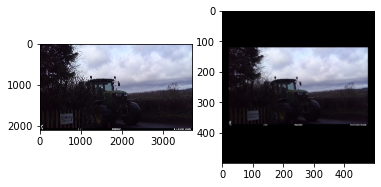

In [25]:
y = imageio.imread(r'C:\DS Project\Images\Tractors\Mike\01Mk0083.JPG')

#y = scipy.misc.imread(r'C:\DS Project\Images\Tractors\Mike\01Mk0083.JPG')

plt.subplot(121)
plt.imshow(y)
h,w,c = y.shape

#x = skimage.transform.resize(y, (256, (w*256)//h), preserve_range=True)

x = bound_image_dim(y, 256, (w*256)//h)
z = square_pad_image(x, 500)
plt.subplot(122)
#plt.imshow(x)
plt.imshow(z)
plt.show()